In [1]:
"""
Training/Validation/Testing
│
└─── 00000
│   │
│   └─── FLAIR
│   │   │ Image.nii.gz
│   │   
│   └─── T1
│   │   │ Image.nii.gz
│   │   
│   └─── T1CE
│   │   │ Image.nii.gz
│   │   
│   └─── T2
│   │   │ Image.nii.gz
|   |   
|   |___ Segmentation
|   |   | Image.nii.gz
│   
└─── 00001
│
│ ... 
│ ...   
│   
└─── 00002
"""

"""
- extracting (called "open" on the file viewer) all the files with ".nii.gz" (basically getting all the files)
- view an image - look into: can you have multiple windows for MRIcro
- also look at the viewer thing in colab

then i can do preprocessing
"""

'\n- extracting (called "open" on the file viewer) all the files with ".nii.gz" (basically getting all the files)\n- view an image - look into: can you have multiple windows for MRIcro\n- also look at the viewer thing in colab\n\nthen i can do preprocessing\n'

In [2]:
!gdown --id 17_VDkS9f0QA8IIGqdWFgm6d2JASBtILt

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17_VDkS9f0QA8IIGqdWFgm6d2JASBtILt
To: /content/brats_120_images.zip
100% 235M/235M [00:02<00:00, 83.4MB/s]


In [3]:
!unzip /content/brats_120_images.zip

Archive:  /content/brats_120_images.zip
   creating: brats_120_images/
  inflating: brats_120_images/BraTS2021_00025_seg.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00025_seg.nii  
  inflating: brats_120_images/BraTS2021_00025_t2.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00025_t2.nii  
  inflating: brats_120_images/BraTS2021_00000_t1ce.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00000_t1ce.nii  
  inflating: brats_120_images/BraTS2021_00025_t1.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00025_t1.nii  
  inflating: brats_120_images/BraTS2021_00032_flair.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00032_flair.nii  
  inflating: brats_120_images/BraTS2021_00003_seg.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00003_seg.nii  
  inflating: brats_120_images/BraTS2021_00026_flair.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00026_flair.nii  
  inflating: brats_120_images/BraTS2021_00011_t1.nii  
  infla

In [4]:
import glob
"""
glob.glob
you can have a function for retrieving the file paths by having a variable for each of the volumes + segmented
e.x. for a segmentation file:
"/Users/shizacharania/Desktop/brats_data/RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/BraTS2021_00000_seg.nii"
then you would look for the "BraTS2021_" in the beginning and the "*/*" stuff and then the "_seg.nii" (the extracted nifti files dont have ".gz")
"""

flair_paths = glob.glob("*/*_flair.nii")
flair_paths = sorted(flair_paths)
print(flair_paths)
print(len(flair_paths))

t1_paths = glob.glob("*/*_t1.nii")
t1_paths = sorted(t1_paths)
print(t1_paths)
print(len(t1_paths))

t1ce_paths = glob.glob("*/*_t1ce.nii")
t1ce_paths = sorted(t1ce_paths)
print(t1ce_paths)
print(len(t1ce_paths))

t2_paths = glob.glob("*/*_t2.nii")
t2_paths = sorted(t2_paths)
print(t2_paths)
print(len(t2_paths))

seg_paths = glob.glob("*/*_seg.nii")
seg_paths = sorted(seg_paths)
print(seg_paths)
print(len(seg_paths))

all = glob.glob("*/*.nii")
print(24*5==len(all))

['brats_120_images/BraTS2021_00000_flair.nii', 'brats_120_images/BraTS2021_00002_flair.nii', 'brats_120_images/BraTS2021_00003_flair.nii', 'brats_120_images/BraTS2021_00005_flair.nii', 'brats_120_images/BraTS2021_00006_flair.nii', 'brats_120_images/BraTS2021_00008_flair.nii', 'brats_120_images/BraTS2021_00009_flair.nii', 'brats_120_images/BraTS2021_00011_flair.nii', 'brats_120_images/BraTS2021_00012_flair.nii', 'brats_120_images/BraTS2021_00014_flair.nii', 'brats_120_images/BraTS2021_00016_flair.nii', 'brats_120_images/BraTS2021_00017_flair.nii', 'brats_120_images/BraTS2021_00018_flair.nii', 'brats_120_images/BraTS2021_00019_flair.nii', 'brats_120_images/BraTS2021_00020_flair.nii', 'brats_120_images/BraTS2021_00021_flair.nii', 'brats_120_images/BraTS2021_00022_flair.nii', 'brats_120_images/BraTS2021_00024_flair.nii', 'brats_120_images/BraTS2021_00025_flair.nii', 'brats_120_images/BraTS2021_00026_flair.nii', 'brats_120_images/BraTS2021_00028_flair.nii', 'brats_120_images/BraTS2021_00030

In [5]:
# /content/brats_data_992/BraTS2021_00275_flair.nii
for i in range(len(flair_paths)):
  flair_paths[i] = "/content/" + flair_paths[i]

for i in range(len(t1_paths)):
  t1_paths[i] = "/content/" + t1_paths[i]

for i in range(len(t1ce_paths)):
  t1ce_paths[i] = "/content/" + t1ce_paths[i]

for i in range(len(t2_paths)):
  t2_paths[i] = "/content/" + t2_paths[i]

for i in range(len(seg_paths)):
  seg_paths[i] = "/content/" + seg_paths[i]

print(flair_paths[0])
print(t1_paths[0])
print(t1ce_paths[0])
print(t2_paths[0])
print(seg_paths[0])

/content/brats_120_images/BraTS2021_00000_flair.nii
/content/brats_120_images/BraTS2021_00000_t1.nii
/content/brats_120_images/BraTS2021_00000_t1ce.nii
/content/brats_120_images/BraTS2021_00000_t2.nii
/content/brats_120_images/BraTS2021_00000_seg.nii


In [6]:
"""
my approach to visualize 3d images:
- use simpleitk (sitk)
   - i need to load the images into sitk format and then convert it into a numpy array

- from a numpy array, i need to do 2 tasks
    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that
    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices

look into basics of simpleitk - how to read the file and then convert it into np.array()
look into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio
look into what fatemeh did: https://youtu.be/rBIetBho0x4
"""

'\nmy approach to visualize 3d images:\n- use simpleitk (sitk)\n   - i need to load the images into sitk format and then convert it into a numpy array\n\n- from a numpy array, i need to do 2 tasks\n    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that\n    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices\n\nlook into basics of simpleitk - how to read the file and then convert it into np.array()\nlook into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio\nlook into what fatemeh did: https://youtu.be/rBIetBho0x4\n'

In [54]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import SimpleITK as sitk

In [55]:
# reading a file in simpleitk (sitk)

flair_nparrays = []
t1_nparrays = []
t1ce_nparrays = []
t2_nparrays = []
seg_nparrays = []

for flair_imagepath in flair_paths:
  img = sitk.ReadImage(flair_imagepath)
  img = sitk.GetArrayFromImage(img)
  flair_nparrays.append(img)

for t1_imagepath in t1_paths:
  img = sitk.ReadImage(t1_imagepath)
  img = sitk.GetArrayFromImage(img)
  t1_nparrays.append(img)

for t1ce_imagepath in t1ce_paths:
  img = sitk.ReadImage(t1ce_imagepath)
  img = sitk.GetArrayFromImage(img)
  t1ce_nparrays.append(img)

for t2_imagepath in t2_paths:
  img = sitk.ReadImage(t2_imagepath)
  img = sitk.GetArrayFromImage(img)
  t2_nparrays.append(img)

for seg_imagepath in seg_paths:
  img = sitk.ReadImage(seg_imagepath)
  img = sitk.GetArrayFromImage(img)
  seg_nparrays.append(img)

In [56]:
print(len(flair_nparrays))
print(len(t1_nparrays))
print(len(t1ce_nparrays))
print(len(t2_nparrays))
print(len(seg_nparrays))

24
24
24
24
24


In [57]:
# i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that

import matplotlib.pyplot as plt
import numpy

In [58]:
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

# I'll do this part by myself after

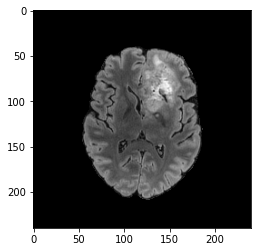

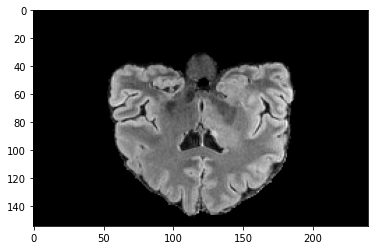

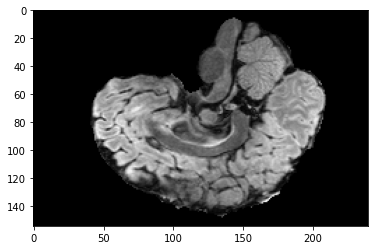

In [59]:
# axial
brain_slice = flair_nparrays[0][77, :, :] # changing Z from [Z,X,Y], which is [155,240,240]
plt.imshow(brain_slice, cmap="gray")
plt.show()

# sagittal
brain_slice = flair_nparrays[0][:, 120, :] # changing X from [Z,X,Y], which is [155,240,240]
plt.imshow(brain_slice, cmap="gray")
plt.show()

# coronal
brain_slice = flair_nparrays[0][:, :, 120] # changing Y from [Z,X,Y], which is [155,240,240]
plt.imshow(brain_slice, cmap="gray")
plt.show()

In [60]:
# testing_img = flair_nparrays[9]
# print(testing_img.shape)
# print(type(testing_img))

# # print(testing_img[:, :, :])

# for i in range(testing_img.shape[0]):
#   brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
#   plt.imshow(brain_slice, cmap="gray")
#   plt.show()
#   plt.close()

Flair Example:
/content/brats_120_images/BraTS2021_00000_flair.nii
/content/brats_120_images/BraTS2021_00002_flair.nii
/content/brats_120_images/BraTS2021_00003_flair.nii
/content/brats_120_images/BraTS2021_00005_flair.nii
/content/brats_120_images/BraTS2021_00006_flair.nii
/content/brats_120_images/BraTS2021_00008_flair.nii
/content/brats_120_images/BraTS2021_00009_flair.nii
/content/brats_120_images/BraTS2021_00011_flair.nii
/content/brats_120_images/BraTS2021_00012_flair.nii
/content/brats_120_images/BraTS2021_00014_flair.nii


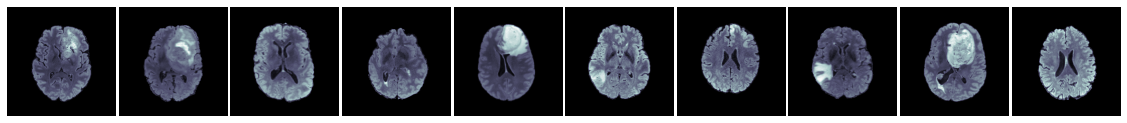

In [61]:
slice_num = 77 # 155/2 = approx. 77
nrows = 10
ncols = 10

plt.figure(figsize=(20,20))

print("Flair Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(flair_paths[i])
  ex_img_flair = flair_nparrays[i]
  plt.imshow(ex_img_flair[slice_num, :, :], cmap="bone")
plt.show()

T1 Example:
/content/brats_120_images/BraTS2021_00000_t1.nii
/content/brats_120_images/BraTS2021_00002_t1.nii
/content/brats_120_images/BraTS2021_00003_t1.nii
/content/brats_120_images/BraTS2021_00005_t1.nii
/content/brats_120_images/BraTS2021_00006_t1.nii
/content/brats_120_images/BraTS2021_00008_t1.nii
/content/brats_120_images/BraTS2021_00009_t1.nii
/content/brats_120_images/BraTS2021_00011_t1.nii
/content/brats_120_images/BraTS2021_00012_t1.nii
/content/brats_120_images/BraTS2021_00014_t1.nii


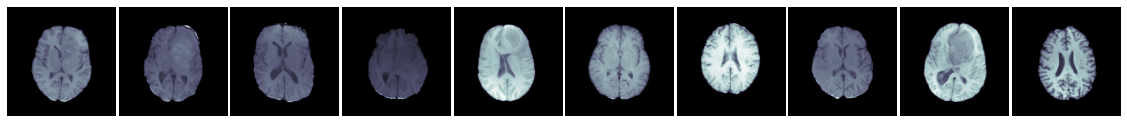

In [62]:
plt.figure(figsize=(20,20))

print("T1 Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(t1_paths[i])
  ex_img_t1 = t1_nparrays[i]
  plt.imshow(ex_img_t1[slice_num, :, :], cmap="bone")
plt.show()

T1CE Example:
/content/brats_120_images/BraTS2021_00000_t1ce.nii
/content/brats_120_images/BraTS2021_00002_t1ce.nii
/content/brats_120_images/BraTS2021_00003_t1ce.nii
/content/brats_120_images/BraTS2021_00005_t1ce.nii
/content/brats_120_images/BraTS2021_00006_t1ce.nii
/content/brats_120_images/BraTS2021_00008_t1ce.nii
/content/brats_120_images/BraTS2021_00009_t1ce.nii
/content/brats_120_images/BraTS2021_00011_t1ce.nii
/content/brats_120_images/BraTS2021_00012_t1ce.nii
/content/brats_120_images/BraTS2021_00014_t1ce.nii


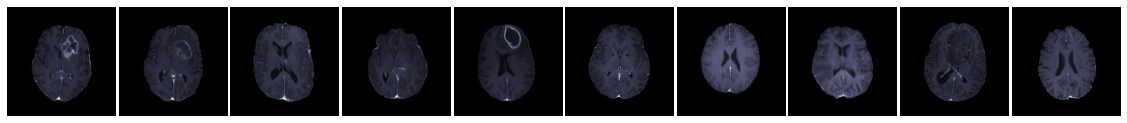

In [63]:
plt.figure(figsize=(20,20))

print("T1CE Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(t1ce_paths[i])
  ex_img_t1ce = t1ce_nparrays[i]
  plt.imshow(ex_img_t1ce[slice_num, :, :], cmap="bone")
plt.show()

T2 Example:
/content/brats_120_images/BraTS2021_00000_t2.nii
/content/brats_120_images/BraTS2021_00002_t2.nii
/content/brats_120_images/BraTS2021_00003_t2.nii
/content/brats_120_images/BraTS2021_00005_t2.nii
/content/brats_120_images/BraTS2021_00006_t2.nii
/content/brats_120_images/BraTS2021_00008_t2.nii
/content/brats_120_images/BraTS2021_00009_t2.nii
/content/brats_120_images/BraTS2021_00011_t2.nii
/content/brats_120_images/BraTS2021_00012_t2.nii
/content/brats_120_images/BraTS2021_00014_t2.nii


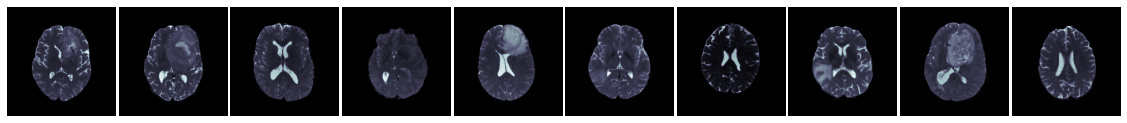

In [64]:
plt.figure(figsize=(20,20))

print("T2 Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(t2_paths[i])
  ex_img_t2 = t2_nparrays[i]
  plt.imshow(ex_img_t2[slice_num, :, :], cmap="bone")
plt.show()

Segmentations Example:
/content/brats_120_images/BraTS2021_00000_seg.nii
/content/brats_120_images/BraTS2021_00002_seg.nii
/content/brats_120_images/BraTS2021_00003_seg.nii
/content/brats_120_images/BraTS2021_00005_seg.nii
/content/brats_120_images/BraTS2021_00006_seg.nii
/content/brats_120_images/BraTS2021_00008_seg.nii
/content/brats_120_images/BraTS2021_00009_seg.nii
/content/brats_120_images/BraTS2021_00011_seg.nii
/content/brats_120_images/BraTS2021_00012_seg.nii
/content/brats_120_images/BraTS2021_00014_seg.nii


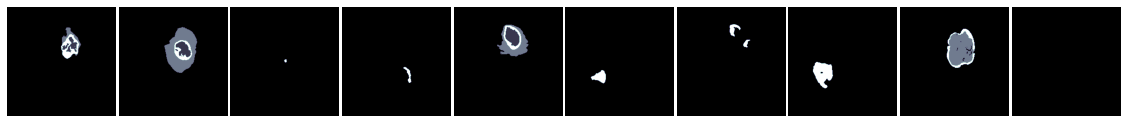

In [65]:
plt.figure(figsize=(20,20))

print("Segmentations Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(seg_paths[i])
  ex_img_seg = seg_nparrays[i]
  plt.imshow(ex_img_seg[slice_num,:, :], cmap="bone")
plt.show()

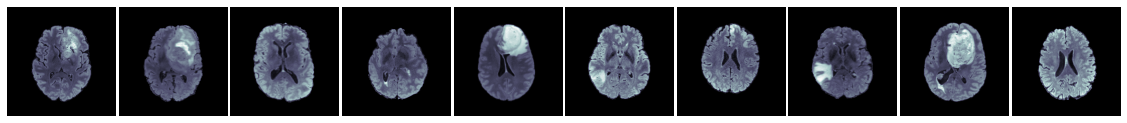

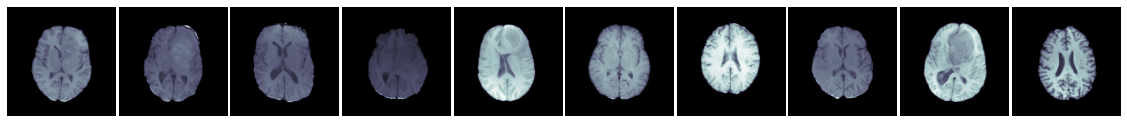

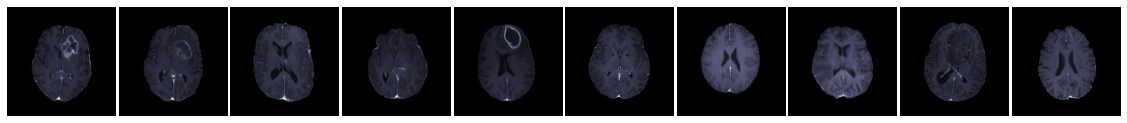

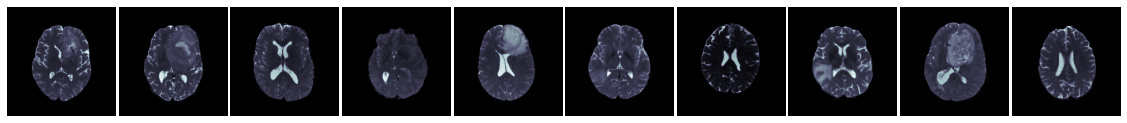

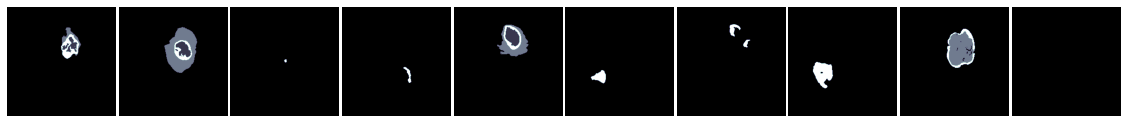

In [66]:
plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_flair = flair_nparrays[i]
  plt.imshow(ex_img_flair[slice_num, :, :], cmap="bone")
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_t1 = t1_nparrays[i]
  plt.imshow(ex_img_t1[slice_num, :, :], cmap="bone")
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_t1ce = t1ce_nparrays[i]
  plt.imshow(ex_img_t1ce[slice_num, :, :], cmap="bone")
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_t2 = t2_nparrays[i]
  plt.imshow(ex_img_t2[slice_num, :, :], cmap="bone")
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_seg = seg_nparrays[i]
  plt.imshow(ex_img_seg[slice_num,:, :], cmap="bone")
plt.show()

# Current Steps
*   Understand how the data (especially with the 4 modalities) will be inputted into the segmentation model


In [256]:
import numpy as np

images_arrays = flair_nparrays+t1_nparrays+t1ce_nparrays+t2_nparrays
seg_arrays = seg_nparrays
print(len(images_arrays))
print(len(seg_arrays))
print(images_arrays[0].shape)

96
24
(155, 240, 240)


In [257]:
patient= 0 #you can change this

@interact # https://youtu.be/rBIetBho0x4 <-- guided visualization from this video
def explore_3d_image(slice=(0,154), modality=["flair", "t1", "t1ce", "t2", "seg"], view=["axial", "coronal", "sagittal"]):
  if modality=="flair":
    img = flair_nparrays[patient]
  elif modality=="t1":
    img = t1_nparrays[patient]
  elif modality=="t1ce":
    img = t1ce_nparrays[patient]
  elif modality=="t2":
    img = t2_nparrays[patient]
  elif modality=="seg":
    img = seg_nparrays[patient]

  print()
  plt.title('Exploring Slices of the Image Data', fontsize=10)
  if view == "axial":
    img=img[slice, :, :]
  elif view == "coronal":
    img=img[:, :, slice]
  elif view == "sagittal":
    img=img[:, slice, :]

  plt.imshow(img, cmap="bone")
  plt.show()

interactive(children=(IntSlider(value=77, description='slice', max=154), Dropdown(description='modality', opti…

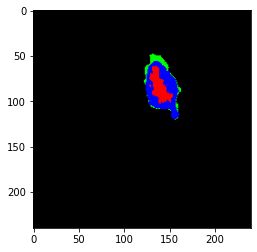

In [258]:
"""
- annotated manually- one to four raters + were approved by experienced neuro-radiologists
- Annotations comprise the
    - GD-enhancing tumor (ET — label 4)
    - peritumoral edematous/invaded tissue (ED — label 2)
    - necrotic tumor core (NCR — label 1)
"""

slice_index = 65
# just for visualization and to see color - will not permantly change the color slices (also we're just doing it to slices to view it)

for i in seg_nparrays:
  color_seg = np.zeros((240,240,3))
  gray_segmentation = i[slice_index,:,:]
  color_seg[gray_segmentation==1] = [255,0,0] # red - if in the array the value is 1 - NECROTIC TUMOUR CORE (NCR — label 1)
  color_seg[gray_segmentation==2] = [0,255,0] # green - if in the array the value is 2 - PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 2)
  color_seg[gray_segmentation==4] = [0,0,255] # blue - GD-ENHANCING TUMOUR (ET — label 4)
  plt.imshow(color_seg, cmap="bone")
  plt.show()
  break

# its because the annotations already have labels - so pixels that have 1 are necrotic tumour, pixels that have 2 are ed and pixels that have 7 are enhancing tumour
# so i dont think i should be changing it into range of 0-1 for preprocessing anyways

In [235]:
def preprocess_randcrop(np_arrays):
  new_arrays = []
  crop_size = 128
  for i in np_arrays: # each volume
    # print(i.shape) # (155, 240, 240)
    start = i.shape[1]//2 - 128//2
    stop = i.shape[1] - start
    slice_start = (i.shape[0]-crop_size)//2
    slice_stop = i.shape[0]-14
    # print(i.shape) # (128, 128, 128)
    # print(start, stop)
    # print(slice_start, slice_stop)
    i = i[slice_start:slice_stop, start:stop, start:stop]
    # print(i.shape)
    new_arrays.append(i)
  return new_arrays

cropped_flair_nparrays = preprocess_randcrop(flair_nparrays)
print(len(cropped_flair_nparrays))
print(cropped_flair_nparrays[0].shape)
cropped_t1_nparrays = preprocess_randcrop(t1_nparrays)
cropped_t1ce_nparrays = preprocess_randcrop(t1ce_nparrays)
cropped_t2_nparrays = preprocess_randcrop(t2_nparrays)

24
(128, 128, 128)


In [236]:
# def find_scale(size):
#   return 128/size

In [237]:
# from scipy.ndimage import zoom

# def preprocess_resize(np_arrays):
#   new_arrays = []
#   for i in range(len(np_arrays)): # each volume
#     img = np_arrays[i]
#     # print(img.shape) # (155, 240, 240)
#     a = zoom(img, (find_scale(img.shape[0]), find_scale(img.shape[1]), find_scale(img.shape[2])))
#     # print(a.shape) # (128, 128, 128)
#     new_arrays.append(a)
#   return new_arrays
# # cropped_t1_nparrays = preprocess_resize(t1_nparrays)
# # print(len(cropped_t1_nparrays))
# # print(cropped_t1_nparrays[0].shape)

In [238]:
def concat_modalities(flair,t1,t1ce,t2):
  concat_arrays = []
  for i in range(len(seg_nparrays)):
    new_f = np.expand_dims(flair[i], axis=0)
    new_t1 = np.expand_dims(t1[i], axis=0)
    new_t1ce = np.expand_dims(t1ce[i], axis=0)
    new_t2 = np.expand_dims(t2[i], axis=0)
    new = np.concatenate((new_f, new_t1, new_t1ce, new_t2), axis=0)
    # print(new.shape)
    # print(new[0].shape)
    concat_arrays.append(new)
  # print(len(concat_arrays))
  return concat_arrays
  
# ex_concat = concat_modalities(flair_nparrays, t1_nparrays, t1ce_nparrays, t2_nparrays)
# print(len(ex_concat))
# print(ex_concat[0].shape)

In [239]:
import math
import numpy as np
import cv2
import torch
from torchvision import transforms

In [240]:
new_f = np.expand_dims(cropped_flair_nparrays[0], axis=0)
new_t1 = np.expand_dims(cropped_t1_nparrays[0], axis=0)
new_t1ce = np.expand_dims(cropped_t1ce_nparrays[0], axis=0)
new_t2 = np.expand_dims(cropped_t2_nparrays[0], axis=0)
new = np.concatenate((new_f, new_t1, new_t1ce, new_t2), axis=0)
print(new.shape)

news_f = np.expand_dims(cropped_flair_nparrays[1], axis=0)
news_t1 = np.expand_dims(cropped_t1_nparrays[1], axis=0)
news_t1ce = np.expand_dims(cropped_t1ce_nparrays[1], axis=0)
news_t2 = np.expand_dims(cropped_t2_nparrays[1], axis=0)
news = np.concatenate((news_f, news_t1, news_t1ce, news_t2), axis=0)
print(news.shape)

(4, 128, 128, 128)
(4, 128, 128, 128)


In [241]:
def one_mean(volume):
  total_pixels = volume.shape[0]*volume.shape[1]*volume.shape[2]*volume.shape[3]
  pixels_sum = 0
  for i in range(volume.shape[0]): # for each channel
    channel_sum = 0
    # slice_num = 0
    for j in range(volume.shape[1]): # for each slice
      current_slice = volume[i][j, :, :]
      current_slice_sum = current_slice.sum()
      channel_sum += current_slice_sum
      # slice_num += 1
    # print("channel " + str(i+1) + " done")
    # print("slices: " + str(slice_num))
    # print()
    pixels_sum += channel_sum
  # print("one image done")
  # print("\nmean:")
  # print(pixels_sum/total_pixels)
  return pixels_sum/total_pixels
    
mean = one_mean(new)
print(mean)
print(np.mean(new))

700.849094748497
700.849094748497


In [242]:
def total_mean(volumes):
  total_mean1 = 0
  total_mean2 = 0
  for i in volumes:
    # print(i.shape)
    # print(one_mean)
    total_mean1 += one_mean(i)
    total_mean2 += np.mean(i)
    continue
  mean1 = total_mean1/len(volumes)
  mean2 = total_mean2/len(volumes)
  # print(mean1)
  # print(mean2)
  return mean1

total_mean([new, news]) # these images are 155x240x240

647.283831179142

In [243]:
def one_std(volume):
  total_pixels = volume.shape[0]*volume.shape[1]*volume.shape[2]*volume.shape[3]
  total_squared_sum_error = 0
  for i in range(volume.shape[0]): # for each channel
    squared_sum_error = 0
    slice_num = 0
    for j in range(volume.shape[1]): # for each slice
      current_slice = volume[i][j, :, :]
      squared_sum_error += ((current_slice-mean)**2).sum()
      slice_num += 1
    # print("channel " + str(i+1) + " done")
    # print("slices: " + str(slice_num))
    # print()
    total_squared_sum_error += squared_sum_error
  # print("one image done")
  # print("\nstd:")
  return math.sqrt(total_squared_sum_error/total_pixels)
    
std = one_std(new)
print(std)
print(np.std(new))

788.6043838044257
788.6043838044257


In [244]:
def total_std(volumes):
  total_std1 = 0
  total_std2 = 0
  for i in volumes:
    total_std1 += one_std(i)
    total_std2 += np.std(i)
    # print(one_std(i))
    # print(np.std(i))
    # print()
  std1 = total_std1/len(volumes)
  std2 = total_std2/len(volumes)
  # print(std1)
  # print(std2)
  return std1

total_std([new, news]) # these images are 155x240x240

750.3430930730348

In [245]:
# def total_mean(volumes):
#   total_std1 = 0
#   for i in volumes:
#     total_std1 += one_std(i)
#   std = total_std1/len(volumes)
#   print(std)

#   total_std2 = 0
#   for i in volumes:
#     total_std2 += np.std(i)
#   npstd = total_std2/len(volumes)
#   print(npstd)

In [246]:
# print(find_mean(images_arrays[2]))
# print(np.mean(images_arrays[2]))

In [247]:
# total_mean = 0
# for i in images_arrays:
#   total_mean += find_mean(i)
# mean = total_mean/len(images_arrays)
# print(mean)
# print(np.mean(images_arrays))

In [248]:
# def find_std(volume):
#   total_pixels = 155*240*240
#   squared_sum_error = 0
#   # print(volume.shape)
#   for i in range(155):
#     current_slice = volume[i, :, :] # got the current slice
#     squared_sum_error += ((current_slice-mean)**2).sum()
#   return math.sqrt(squared_sum_error/total_pixels)

In [249]:
# print(find_std(images_arrays[2]))
# print(np.std(images_arrays[2]))

In [250]:
# total_std1 = 0
# for i in images_arrays:
#   total_std1 += find_std(i)
# std = total_std1/len(images_arrays)
# print(std)

# total_std2 = 0
# for i in images_arrays:
#   total_std2 += np.std(i)
# npstd = total_std2/len(images_arrays)
# print(npstd)

In [251]:
"""
my standard deviation is very similar, but there’s a difference by a few decimal points.
Darien mentioned in one of our first calls a few weeks ago that the values when done manually and with numpy might be a bit off,
so im curious to know why that might be the case

matlab/pandas and numpy have diff answers because matlab has unbiased estimator
(https://www.aboutdatablog.com/post/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results)
but here im following the exact formula in numpy

those differences accumulate in order to have a few values off in the final std of the whole dataset. is that okay? even then, why is it the case?

https://kozodoi.me/python/deep%20learning/pytorch/tutorial/2021/03/08/image-mean-std.html <-- also tried new formula, but didn't work (showed error)
"""

"\nmy standard deviation is very similar, but there’s a difference by a few decimal points.\nDarien mentioned in one of our first calls a few weeks ago that the values when done manually and with numpy might be a bit off,\nso im curious to know why that might be the case\n\nmatlab/pandas and numpy have diff answers because matlab has unbiased estimator\n(https://www.aboutdatablog.com/post/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results)\nbut here im following the exact formula in numpy\n\nthose differences accumulate in order to have a few values off in the final std of the whole dataset. is that okay? even then, why is it the case?\n\nhttps://kozodoi.me/python/deep%20learning/pytorch/tutorial/2021/03/08/image-mean-std.html <-- also tried new formula, but didn't work (showed error)\n"

In [252]:
# print("Mean: " + str(mean) + " ----- " + "Standard Deviation: " + str(std))

In [263]:
# preprocessing
"""
- write down what i need to do for that step
- will get (1x128x128x128 for this)
"""
def img_preprocess_array(modalities_arr):
  image_data = []

  cropped_arrs = []
  for modality_arr in modalities_arr:
      cropped_arr = preprocess_randcrop(modality_arr)
      print(cropped_arr[0].shape)
      cropped_arrs.append(cropped_arr)
  print(len(cropped_arrs))
  print(len(cropped_arrs[1]))
  print(cropped_arrs[3][0].shape)

  # concat
  concatenated_arrs = concat_modalities(cropped_arrs[0], cropped_arrs[1], cropped_arrs[2], cropped_arrs[3])
  print(len(concatenated_arrs))
  print(concatenated_arrs[0].shape)

  # find mean and std
  mean = total_mean(concatenated_arrs) # the images I tried on before were 155x240x240 and the mean was around the 175 mark
  # ^the reason why the mean is a lot higher (about 753.58) is because you are removing a lot of pixels from the edges and taking out slices with spase information (which has pixel values of 0)
  # taking out 0 values automatically inflates the mean
  print()
  std = total_std(concatenated_arrs)

  for concat_arr in concatenated_arrs:
    transformed_channels = []
    for channel in concat_arr: 
      # print(channel.shape)
      transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.ConvertImageDtype(torch.float32),
                                      transforms.Normalize(mean, std)]) # done in the same order as mentioned
                                      # for normalization Given mean: (mean[1],...,mean[n]) and std: (std[1],..,std[n]) for n channels, this transform will normalize each channel of the input torch
                                      # Tensor i.e., output[channel] = (input[channel] - mean[channel]) / std[channel]
                                      # so it's okay if you do one channel at a time, but still use the same mean and std as the volume would use
      channel = transform(channel)
      # print(channel.shape)
      transformed_channels.append(channel)
    new_tc0 = np.expand_dims(transformed_channels[0], axis=0)
    new_tc1 = np.expand_dims(transformed_channels[1], axis=0)
    new_tc2 = np.expand_dims(transformed_channels[2], axis=0)
    new_tc3 = np.expand_dims(transformed_channels[3], axis=0)
    image_data.append(np.concatenate((new_tc0, new_tc1, new_tc2, new_tc3), axis=0))
    
  print(len(image_data))
  print(image_data[0].shape)

  return image_data

image_data = img_preprocess_array([flair_nparrays, t1_nparrays, t1ce_nparrays, t2_nparrays])

(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
4
24
(128, 128, 128)
24
(4, 128, 128, 128)

24
(4, 128, 128, 128)


In [264]:
print(len(image_data))
print(image_data[0].shape)

24
(4, 128, 128, 128)


In [285]:
def seg_preprocess_array(mix_modality_seg_arr):
  segmentation_data = []
  print(mix_modality_seg_arr[0].shape)
  mix_modality_seg_arr = preprocess_randcrop(mix_modality_seg_arr)
  print(mix_modality_seg_arr[0].shape)
  mix_modality_seg_arr = np.array(mix_modality_seg_arr, dtype="float32") # need to convert to float32 so it can convert to tensor
  for image in mix_modality_seg_arr:
    image = transforms.ToTensor()(image)
    print(image.dtype) # no need for "transforms.ConvertImageDtype(torch.float32)" since tensor already has a dtype of float32
  segmentation_data.append(image)
  return segmentation_data

segmentation_data = seg_preprocess_array(seg_nparrays)

(155, 240, 240)
(128, 128, 128)
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32


In [286]:
print(len(segmentation_data))
print(segmentation_data[0].shape)

1
torch.Size([128, 128, 128])


In [287]:
# make data loaders and stuff

# Next Steps
*   Read some more preprocessing papers to see if something new comes up with preprocessing steps
*   Preprocessing code
* Read model papers